# Luminosity Function 

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pyplot import cm

import numpy as np

import astropy.units as u
from astropy.cosmology import FlatLambdaCDM

import h5py
import itertools

In [2]:
# load the data including scaling relation and luminosiy cut.
dat = np.load("sfr_catalog_0.258000_w_scaling_relations_masked_L41_pos400.npy", allow_pickle=True)


In [3]:
sfr = dat["sfr"]
pos = dat['pos']

Processing alpha = 105, beta = 9.530236113287146e+21
CPU times: user 791 ms, sys: 33.6 ms, total: 825 ms
Wall time: 828 ms


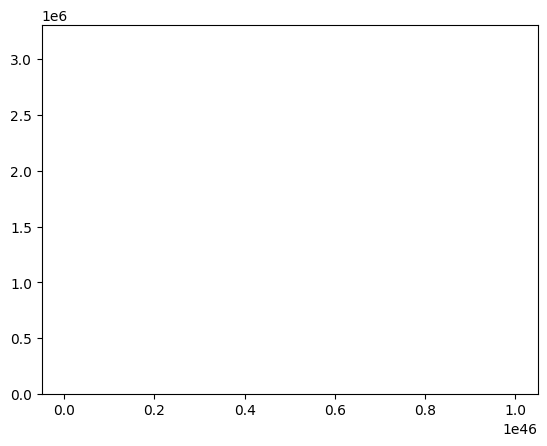

In [4]:
%%time

# Here I just run it for one example of alpha and beta:
alpha_values = np.array([105])
betaa_values = np.array([2e-4])


# Define the range of values for alpha and beta
#alpha_values = np.array([5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100,
#                        105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180,
#                        185, 190, 195, 200])
#betaa_values = np.array([0.6e-4, 0.7e-4, 0.8e-4, 0.9e-4, 1e-4,
#                        1.1e-4, 1.2e-4, 1.3e-4, 1.4e-4, 1.5e-4, 1.6e-4, 1.7e-4, 1.8e-4, 1.9e-4, 2e-4,
#                        2.1e-4, 2.2e-4, 2.3e-4, 2.4e-4, 2.5e-4, 2.6e-4, 2.7e-4, 2.8e-4, 2.9e-4, 3e-4,
#                        3.1e-4, 3.2e-4, 3.3e-4, 3.4e-4, 3.5e-4, 3.6e-4, 3.7e-4, 3.8e-4, 3.9e-4, 4e-4,
#                        4.1e-4, 4.2e-4, 4.3e-4, 4.4e-4, 4.5e-4, 4.6e-4, 4.7e-4, 4.8e-4, 4.9e-4, 5e-4])



M_Sun = 1.9891e30
m_H = 1.67e-27 # in kg
beta_values = (betaa_values)/(4*np.pi*m_H)

# Use itertools.product to generate all combinations
combinations = list(itertools.product(alpha_values, beta_values))


bin = np.logspace(41,46,100)


for alpha, beta in combinations:
    print(f"Processing alpha = {alpha}, beta = {beta}")

    # Specify the file paths
    file_path_esc_ISM = f'f_esc_ISM_alpha_{alpha}_beta_{beta}_a=0.258000_z=2.88.h5'
    file_path_esc_IGM = f'f_esc_IGM_alpha_{alpha}_beta_{beta}_a=0.258000_z=2.88.h5'

    # Open the HDF5 files
    with h5py.File(file_path_esc_ISM, 'r') as file_esc_ISM, h5py.File(file_path_esc_IGM, 'r') as file_esc_IGM:
        # Access the datasets within the HDF5 files
        data_esc_ISM = file_esc_ISM['f_esc_Arr']
        data_esc_IGM = file_esc_IGM['f_IGM']

        # Now, you can use the data as NumPy arrays
        np_data_esc_ISM = np.array(data_esc_ISM)
        np_data_esc_IGM = np.array(data_esc_IGM)



    # Lya luminosity
    L_int_Lya = 1.1e42 * sfr  # erg/s
    L_Lya = np_data_esc_ISM * L_int_Lya
    L_Lya_igm = L_Lya * np_data_esc_IGM

    
    
    cut = (L_Lya >= 10**(41)) & (pos[:,0] < 400) & (pos[:,0] > 0) & (pos[:,1] < 400) & (pos[:,1] > 0) & (pos[:,2] < 400) & (pos[:,2] > 0)
    L_Lya_selected = L_Lya[cut]

    cut_igm = (L_Lya_igm >= 10**(41)) & (pos[:,0] < 400) & (pos[:,0] > 0) & (pos[:,1] < 400) & (pos[:,1] > 0) & (pos[:,2] < 400) & (pos[:,2] > 0)
    L_Lya_selected_igm = L_Lya_igm[cut_igm]

    
    indices = np.argwhere(L_Lya >= cut)
    indices_igm = np.argwhere(L_Lya_igm >= cut)

    
    logL = np.log10(L_Lya_selected)
    n,x,_ =plt.hist(10**logL,color='white',histtype='step',bins=bin,cumulative=-1,alpha=0)
    bin_centers = 0.5*(x[1:]+x[:-1])
    h = 0.6777
    box_vol = 400*h
    cov_vol=(box_vol)**3
    delta_log_L = 1


    np.savetxt('LF_ISM_alpha_'+str(alpha)+'_beta_'+str(beta)+'_a=0.258000_z=2.88.txt',np.column_stack((bin_centers,(n/cov_vol)*delta_log_L)))

    
    logL_igm = np.log10(L_Lya_selected_igm)
    n_igm,x_igm,_ =plt.hist(10**logL_igm,color='white',histtype='step',bins=bin,cumulative=-1,alpha=0)

    bin_centers_igm = 0.5*(x_igm[1:]+x_igm[:-1])
    h = 0.6777
    box_vol_igm = 400*h
    cov_vol_igm=(box_vol_igm)**3
    delta_log_L_igm = 1
    np.savetxt('LF_IGM_alpha_'+str(alpha)+'_beta_'+str(beta)+'_a=0.258000_z=2.88.txt',np.column_stack((bin_centers_igm,(n_igm/cov_vol_igm)*delta_log_L_igm)))


    #Intrinsic
    logL_int_Lya = np.log10(L_int_Lya)
    n_int_Lya,x_int_Lya,_ =plt.hist(10**logL_int_Lya,color='white',histtype='step',bins=bin,cumulative=-1,alpha=0)
    bin_centers1 = 0.5*(x_int_Lya[1:]+x_int_Lya[:-1])
    h = 0.6777
    box_vol = 400*h
    cov_vol=(box_vol)**3
    delta_log_L = 1
    np.savetxt('LF_intrinsic_alpha_'+str(alpha)+'_beta_'+str(beta)+'_a=0.258000_z=2.88.txt',np.column_stack((bin_centers1,(n_int_Lya/cov_vol)*delta_log_L)))



After running for all the alpha-beta parameter space, we can plot it for some special values for alpha and beta:

In [5]:
alpha = 105
print('alpha = ',alpha)
M_Sun = 1.9891e30
m_H = 1.67e-27 # in kg
betaa = 2e-4
beta = (betaa)/(4*np.pi*m_H)
print('beta = ',beta)
print(np.log10(alpha),np.log10(beta))

ism = np.loadtxt('LF_ISM_alpha_'+str(alpha)+'_beta_'+str(beta)+'_a=0.258000_z=2.88.txt')
igm = np.loadtxt('LF_IGM_alpha_'+str(alpha)+'_beta_'+str(beta)+'_a=0.258000_z=2.88.txt')
intt = np.loadtxt('LF_intrinsic_alpha_'+str(alpha)+'_beta_'+str(beta)+'_a=0.258000_z=2.88.txt')



alpha =  105
beta =  9.530236113287146e+21
2.0211892990699383 21.979103660494303


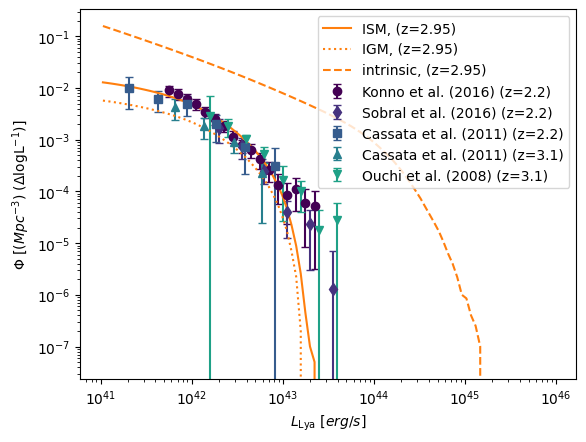

In [6]:
color_line=cm.viridis(np.linspace(0,1,8))

L_meas_konno16 = [5.6372e+41,7.0968e+41,8.9344e+41,1.1248e+42,1.4160e+42,1.7826e+42,2.2442e+42,2.8253e+42,3.5568e+42,4.4778e+42,5.6372e+42,7.0968e+42,8.8907e+42,1.1248e+43,1.4091e+43,1.7739e+43,2.2332e+43,2.8115e+43,3.5395e+43,4.4559e+43,5.6097e+43,7.0621e+43,8.8907e+43,1.1193e+44,1.4091e+44,1.7739e+44,2.2332e+44]
Phi_meas_konno16 = [0.0089869,0.0077939,0.0062203,0.0049059,0.0034362,0.0024941,0.0018537,0.0011531,0.00077939,0.00063698,0.00041549,0.00026466,0.00013615,0.000083691,0.00011260,0.000060744,0.000052680,0.000022681,0.000045687,0.000037785,0.0000075212,0.000030157,0.0000075212,0.000022681,0.000014971,0.0000074325,0.0000075212]
err_konno16 = [0.0021379,0.0018544,0.00148,0.0011153,0.0007812,0.0005935,0.000466,0.000302,0.00022277,0.00019502,0.00014872,0.00011139,0.00007862,0.000060152,0.000070606,0.000052249,0.000049544,0.000034908,0.000046347,0.000042576,0.0000236731,0.000039076,0.0000239701,0.000035029,0.00002992,0.0000236731,0.0000236731]
err2_konno = (np.array(Phi_meas_konno16) * np.array(err_konno16) )/ 0.434


L_meas_sobral16 = [1.9922e+42,3.5495e+42,6.2999e+42,1.1225e+43,1.9922e+43,3.5495e+43]
Phi_meas_sobral16 = [0.0017170,0.00076317,0.00025093,0.000039440,0.000023698,0.0000012901]
err_sobral16 = [0.0008517,0.00033937,0.00011369,0.000026748,0.000020719,0.0000058113]
err2_sobral16 = (np.array(Phi_meas_sobral16) * np.array(err_sobral16) )/ 0.434

L_meas_cassata11 = [2.0300e+41,4.2658e+41,8.9125e+41,1.8621e+42,3.8905e+42,8.1283e+42]
Phi_meas_cassata11 = [0.010224,0.0060476,0.0048442,0.0019943,0.00070812,0.00031390]
err_cassata11 = [0.0062198,0.0025568,0.0020207,0.0010808,0.00049077,0.00036681]
err2_cassata11 = (np.array(Phi_meas_cassata11) * np.array(err_cassata11) )/ 0.434


L_meas_cassata113 = [6.5690e+41,1.3646e+42,2.8840e+42,5.9910e+42]
Phi_meas_cassata113 = [0.0042404,0.0018385,0.00092414,0.00022670]
err_cassata113 = [0.0018329,0.0007895,0.00037959,0.00020175]
err2_cassata113 = (np.array(Phi_meas_cassata113) * np.array(err_cassata113) )/ 0.434


L_meas_ouchi08 = [1.5837e+42,2.5080e+42,3.9718e+42,6.2899e+42,9.9611e+42,1.5837e+43,2.5080e+43,3.9718e+43]
Phi_meas_ouchi08 = [0.0028166,0.0018071,0.0010393,0.00053932,0.00016622,0.00010065,0.000018188,0.000027450]
err_ouchi08 = [0.00418491,0.0006928,0.00020215,0.00018872,0.0001393,0.000060352,0.000025756,0.000031391]
err2_ouchi08 = (np.array(Phi_meas_ouchi08) * np.array(err_ouchi08) )/ 0.434




plt.errorbar(L_meas_konno16[0:17],Phi_meas_konno16[0:17],yerr=err_konno16[0:17],capsize=3,fmt='o',color=color_line[0],label='Konno et al. (2016) (z=2.2)')
plt.errorbar(L_meas_sobral16,Phi_meas_sobral16,yerr=err_sobral16,capsize=3,fmt='d',color=color_line[1],label='Sobral et al. (2016) (z=2.2)')
plt.errorbar(L_meas_cassata11,Phi_meas_cassata11,yerr=err_cassata11,capsize=3,fmt='s',color=color_line[2],label='Cassata et al. (2011) (z=2.2)')
plt.errorbar(L_meas_cassata113,Phi_meas_cassata113,yerr=err_cassata113,capsize=3,fmt='^',color=color_line[3],label='Cassata et al. (2011) (z=3.1)')
plt.errorbar(L_meas_ouchi08,Phi_meas_ouchi08,yerr=err_ouchi08,capsize=3,fmt='v',color=color_line[4],label='Ouchi et al. (2008) (z=3.1)')



plt.plot(ism[:,0],ism[:,1],color='C1',label='ISM, (z=2.95)')
plt.plot(igm[:,0],igm[:,1],color='C1',linestyle=':',label='IGM, (z=2.95)')
plt.plot(intt[:,0],intt[:,1],color='C1',linestyle='--')


plt.xscale('log')
plt.yscale('log')

plt.plot(np.NaN, np.NaN, color='C1',linestyle='--' ,label='intrinsic, (z=2.95)')
#plt.plot(np.NaN, np.NaN, color='k',linestyle='-' ,label='1fluid')

#plt.text(1e41,1e4, r'$log\alpha=1.60,\,\,log\beta=21.67$',color='k')
#plt.text(1e41,1e3, r'$L>1\times10^{41}\,[erg/s]$',color='k')
#plt.text(1e41,1e2, r'$z=2.95$',color='k')




#plt.ylim(1e-9,1e-2)
#plt.xlim(6e40,3e45)

plt.ylabel(r'$\Phi\,\,[(Mpc^{-3})\,\,(\Delta\rm{log}L^{-1})]$')
plt.xlabel(r'$L_{\rm{Lya}}\,\,[erg/s]$')
plt.legend(loc='upper right')